In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('ggplot')
%matplotlib inline

In [2]:
with open('Manual WorkItems alltypes Security.csv', encoding='ascii', errors='ignore') as infile:
    dataset1 = pd.read_csv(infile,names = ['Title', 'Security', 'SourceLink'])
with open('Manual WorkItems alltypes nonSecurity.csv', encoding='ascii', errors='ignore') as infile:
    dataset2 = pd.read_csv(infile,names = ['Title', 'Security', 'SourceLink'])
    
dataset1 = dataset1.sample(frac = 0.45, random_state= 123).reset_index(drop = True)
dataset1.info()

dataset1['IsSecured'] = 1
dataset2['IsSecured'] = 0

dataset = pd.concat([dataset1, dataset2]).reset_index(drop = True)
dataset = dataset.sample(frac = 1).reset_index(drop = True)

dataset.dropna(axis=0, how='any', inplace = True)
dataset=dataset.reset_index(drop=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63262 entries, 0 to 63261
Data columns (total 3 columns):
Title         63261 non-null object
Security      63262 non-null object
SourceLink    63262 non-null object
dtypes: object(3)
memory usage: 1.4+ MB


In [3]:
from nltk.corpus import stopwords
my_stopwords = stopwords.words('english')
#type(my_stopwords),my_stopwords

In [4]:
from patsy import dmatrices
import statsmodels.discrete.discrete_model as sm1
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
import os, sys
def splitall(path):
    allparts = []
    while 1:
        parts = os.path.split(path)
        if parts[0] == path:  # sentinel for absolute paths
            allparts.insert(0, parts[0])
            break
        elif parts[1] == path: # sentinel for relative paths
            allparts.insert(0, parts[1])
            break
        else:
            path = parts[0]
            allparts.insert(0, parts[1])
    return " ".join(allparts)

In [6]:
#I will now apply the splitall function on the dataset.
dataset['Parsed Title'] = dataset['Title'].apply(splitall)
#dataset.head(100)

In [7]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
def clean_text(text):
    text = "".join([char if char.isalpha() else " " for char in text.lower()]).split()
    #text = [ps.stem(word) for word in text]
    #text = " ".join([word for word in text if (word not in my_stopwords and len(word) > 2)])
    text = " ".join([word for word in text if (len(word) > 2)])
    return text.lower()

In [8]:
%time dataset['Clean Title'] = dataset['Parsed Title'].apply(clean_text)

Wall time: 2.69 s


In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.feature_selection import SelectPercentile, f_classif
X, y = dataset['Clean Title'], dataset['IsSecured']
tv = TfidfVectorizer(min_df=0.001, max_df= 1.0, use_idf=True,ngram_range=(1,3))
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
Test_data=pd.concat([X_val,y_val],axis=1)
X_train = tv.fit_transform(X_train)#.toarray()
#X_test = tv.transform(X_test)#.toarray()
X_val = tv.transform(X_val)#.toarray()
vocab = tv.get_feature_names()
# y_test = np.array(list(y_test))
# y_train = np.array(list(y_train))
# y_val = np.array(list(y_val))
print(len(vocab))


2169


In [73]:
Test_data=Test_data.reset_index(drop=True)
Test_data.head()

,Clean Title,IsSecured
0,security check for xss and sql injection valid...,1
1,screen readers network performance monitor pat...,0
2,securitytsbasics failed selftest,1
3,investigative exo security hacking,1
4,psosre opstask cleanup pks eus other unused ob...,1


In [74]:
X_val.shape,X_train.shape

((24412, 2169), (97646, 2169))

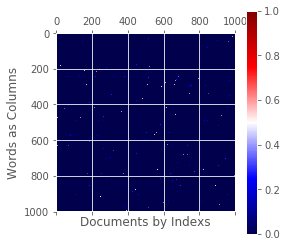

In [11]:
# Making plot of the newly fitted count vectorizer
plt.matshow(X_train[0:1000,0:1000].toarray().T, cmap='seismic', origin='upper' )
plt.xlabel('Documents by Indexs')
plt.ylabel('Words as Columns')
#plt.xticks(np.arange(5),['S1','S2','S3','S4','S5'])
#plt.yticks(np.arange(len(tfidf_vect.get_feature_names())),tfidf_vect.get_feature_names())
plt.colorbar()

In [75]:
from __future__ import print_function

import logging
import numpy as np
from optparse import OptionParser
import sys
from time import time
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.extmath import density
from sklearn import metrics


# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')

print("Extracting best features by a chi-squared test")
t0 = time()
ch2 = SelectKBest(chi2, k=1000)
X_train = ch2.fit_transform(X_train, y_train)
X_val=ch2.transform(X_val)
#X_test = ch2.transform(X_test)
feature_names = [vocab[i] for i in ch2.get_support(indices=True)]
print("done in %fs" % (time() - t0))
print(feature_names)

Extracting best features by a chi-squared test
done in 0.084901s
['aad', 'about', 'about the', 'acc', 'access', 'access violation', 'accessibility', 'accessibility android', 'accessibility focus', 'accessibility high', 'accessibility high contrast', 'accessibility ios', 'accessibility keyboard', 'accessibility keyboard navigation', 'accessibility mac', 'accessibility mas', 'accessibility mas inspect', 'accessibility narrator', 'accessibility review', 'accessibility screen', 'accessibility screen reader', 'accessibility screen readers', 'accessibility visual', 'accessibility win', 'accessible', 'accessible name', 'accessible through', 'accessible through keyboard', 'accessible using', 'accessible using keyboard', 'accessible via', 'accessible via keyboard', 'accounts', 'acis', 'activate', 'activating', 'adminportal', 'afd', 'aft', 'after', 'after activating', 'after selecting', 'album', 'allow', 'allows', 'alt', 'alt text', 'amazon', 'announce', 'announce the', 'announced', 'announces',

In [76]:
target_names=y_train.values
target_names

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [77]:
X2 = pd.DataFrame(X_train.toarray(), columns = feature_names)
X3 = pd.DataFrame(X_val.toarray(), columns = feature_names)

#feature_names = feature_names +['Intercept']
X2[feature_names]=X2[feature_names].astype('float32')
X2[feature_names]=X2[feature_names].round(2)

In [78]:
X_train=X2
X_val=X3

In [79]:
def trim(s):
    """Trim string to fit on terminal (assuming 80-column display)"""
    return s if len(s) <= 80 else s[:77] + "..."

import pickle

In [80]:
# #############################################################################
# Benchmark classifiers
from sklearn.model_selection import StratifiedKFold
def benchmark(clf):
    print('_' * 80)
    print("Training: ")
    print(clf)
    t0 = time()
    clf.fit(X_train, y_train)
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)

    t0 = time()
    pred = clf.predict(X_val)
    test_time = time() - t0
    print("Validation time:  %0.3fs" % test_time)
    
    global Test_data
    clf_descr = str(clf).split('(')[0]
    if clf_descr not in ['RidgeClassifier','NearestCentroid','LinearSVC']:
        pred_prob_test = clf.predict_proba(X_val)
        flat_list=[]
        for sublist in [i for i in pred_prob_test]:
            flat_list.append(sublist)
        flat_list=pd.DataFrame(flat_list,columns=[str(clf_descr)+"Prob_for_0",str(clf_descr)+"Prob_for_1"])
        #cols_t=[Test_data.columns,str(clf_descr)+"Prediction",flat_list.columns]
        pred_ser=pd.Series(pred)
        pred_ser=pred_ser.rename(str(clf_descr)+"Prediction")
        Test_data=pd.concat([pd.DataFrame(Test_data),pd.Series(pred_ser),flat_list],axis=1)
        #Test_data=Test_data.rename(columns = {'0':str(clf_descr)+"Prediction"})
        
    score = metrics.accuracy_score(y_val, pred)
    print("accuracy:   %0.3f" % score)
    
    f1_score = metrics.f1_score(y_val, pred)
    print("f1_score:   %0.3f" % f1_score)
    
    precision_score = metrics.precision_score(y_val, pred)
    print("precision_score:   %0.3f" % precision_score)
    
    recall_score = metrics.recall_score(y_val, pred)
    print("recall_score:   %0.3f" % recall_score)
    
    roc_auc_score = metrics.roc_auc_score(y_val, pred)
    print("roc_auc_score:   %0.3f" % roc_auc_score)
    
    fpr, tpr, thresh = metrics.roc_curve(y_val, pred)
    
    if hasattr(clf, 'coef_'):
        print("dimensionality: %d" % clf.coef_.shape[1])
        print("density: %f" % density(clf.coef_))

        #print("top 20 keywords per class:")
        #for i, label in enumerate(target_names):
            #top20 = np.argsort(clf.coef_[i])[-20:]
            #print(feature_names[top20])
        print()

    print("classification report:")
    print(metrics.classification_report(y_val, pred,
                                            target_names=['class1','class0']))

    print("confusion matrix:")
    print(metrics.confusion_matrix(y_val, pred))
    
    #from pandas_ml import ConfusionMatrix
    #print(ConfusionMatrix(y_val, pred))

    print()
    clf_descr = str(clf).split('(')[0]
    
    # make some plots
    #print(fpr,tpr,roc_auc_score)
    #training_time = np.array(training_time) / np.max(training_time)
    #test_time = np.array(test_time) / np.max(test_time)
    plt.figure()
    plt.plot(fpr,tpr, color='darkorange',lw=2, linestyle='--',label=str(clf_descr)+'(area = %0.2f)' % roc_auc_score)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    
    #pickle_out = open(clf_descr,"wb")
    #pickle.dump(clf, pickle_out)
    #pickle_out.close()

    return clf_descr,score,train_time,test_time,f1_score,precision_score,recall_score,roc_auc_score,fpr,tpr

Ridge Classifier
________________________________________________________________________________
Training: 
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='lsqr',
        tol=0.01)
train time: 3.014s
Validation time:  0.078s
accuracy:   0.917
f1_score:   0.923
precision_score:   0.889
recall_score:   0.959
roc_auc_score:   0.916
dimensionality: 1000
density: 1.000000

classification report:
             precision    recall  f1-score   support

     class1       0.95      0.87      0.91     11804
     class0       0.89      0.96      0.92     12608

avg / total       0.92      0.92      0.92     24412

confusion matrix:
[[10299  1505]
 [  512 12096]]



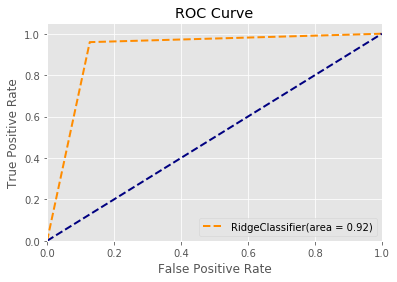

Random forest
________________________________________________________________________________
Training: 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=50, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=4,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
train time: 600.702s
Validation time:  4.960s
accuracy:   0.916
f1_score:   0.919
precision_score:   0.909
recall_score:   0.929
roc_auc_score:   0.915
classification report:
             precision    recall  f1-score   support

     class1       0.92      0.90      0.91     11804
     class0       0.91      0.93      0.92     12608

avg / total       0.92      0.92      0.92     24412

confusion matrix:
[[10634  1170]
 [  891 11717]]



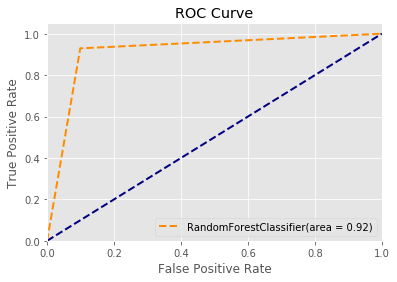

L2 penalty
________________________________________________________________________________
Training: 
LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.01,
     verbose=0)
train time: 1.237s
Validation time:  0.068s
accuracy:   0.921
f1_score:   0.926
precision_score:   0.898
recall_score:   0.955
roc_auc_score:   0.920
dimensionality: 1000
density: 1.000000

classification report:
             precision    recall  f1-score   support

     class1       0.95      0.88      0.92     11804
     class0       0.90      0.96      0.93     12608

avg / total       0.92      0.92      0.92     24412

confusion matrix:
[[10437  1367]
 [  567 12041]]



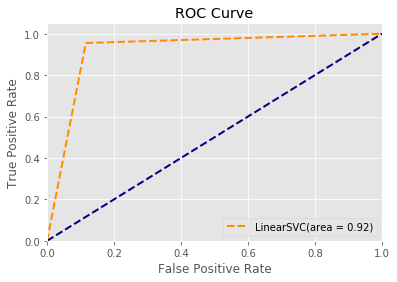

L1 penalty
________________________________________________________________________________
Training: 
LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.01,
     verbose=0)
train time: 1.019s
Validation time:  0.062s
accuracy:   0.921
f1_score:   0.926
precision_score:   0.898
recall_score:   0.955
roc_auc_score:   0.920
dimensionality: 1000
density: 0.799000

classification report:
             precision    recall  f1-score   support

     class1       0.95      0.88      0.92     11804
     class0       0.90      0.95      0.93     12608

avg / total       0.92      0.92      0.92     24412

confusion matrix:
[[10443  1361]
 [  568 12040]]



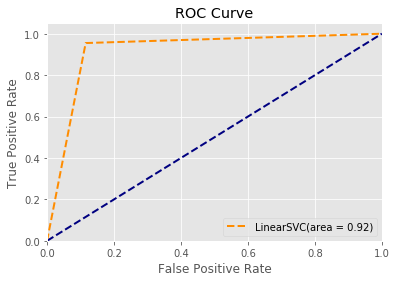

NearestCentroid (aka Rocchio classifier)
________________________________________________________________________________
Training: 
NearestCentroid(metric='euclidean', shrink_threshold=None)
train time: 0.562s
Validation time:  0.109s
accuracy:   0.856
f1_score:   0.867
precision_score:   0.827
recall_score:   0.912
roc_auc_score:   0.854
classification report:
             precision    recall  f1-score   support

     class1       0.89      0.80      0.84     11804
     class0       0.83      0.91      0.87     12608

avg / total       0.86      0.86      0.86     24412

confusion matrix:
[[ 9400  2404]
 [ 1115 11493]]



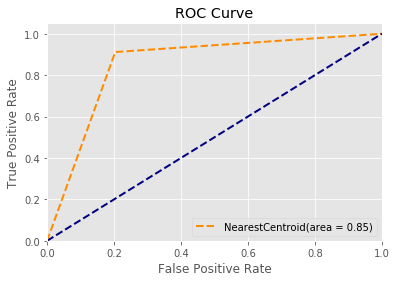

Naive Bayes
________________________________________________________________________________
Training: 
MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)
train time: 0.650s
Validation time:  0.063s
accuracy:   0.892
f1_score:   0.894
precision_score:   0.901
recall_score:   0.887
roc_auc_score:   0.892
dimensionality: 1000
density: 1.000000

classification report:
             precision    recall  f1-score   support

     class1       0.88      0.90      0.89     11804
     class0       0.90      0.89      0.89     12608

avg / total       0.89      0.89      0.89     24412

confusion matrix:
[[10580  1224]
 [ 1422 11186]]



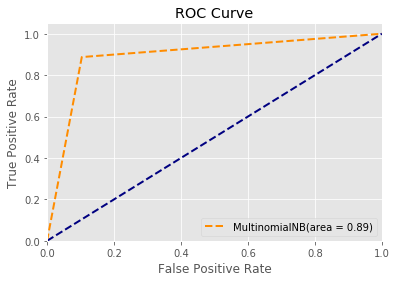

________________________________________________________________________________
Training: 
BernoulliNB(alpha=0.1, binarize=0.0, class_prior=None, fit_prior=True)
train time: 3.176s
Validation time:  0.460s
accuracy:   0.864
f1_score:   0.877
precision_score:   0.818
recall_score:   0.946
roc_auc_score:   0.861
dimensionality: 1000
density: 1.000000

classification report:
             precision    recall  f1-score   support

     class1       0.93      0.78      0.85     11804
     class0       0.82      0.95      0.88     12608

avg / total       0.87      0.86      0.86     24412

confusion matrix:
[[ 9159  2645]
 [  687 11921]]



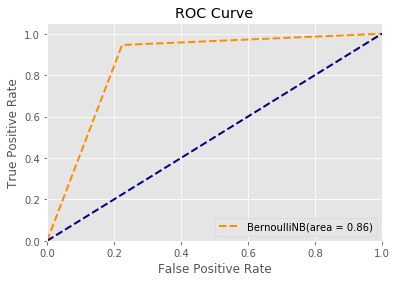

In [81]:
results = []
for clf, name in (
        (RidgeClassifier(tol=1e-2, solver="lsqr"), "Ridge Classifier"),
        #(KNeighborsClassifier(n_neighbors=5,n_jobs=4), "kNN"),
        (RandomForestClassifier(n_estimators=500,max_features=50,n_jobs=4), "Random forest")):
    print('=' * 80)
    print(name)
    results.append(benchmark(clf))

for penalty in ["l2", "l1"]:
    print('=' * 80)
    print("%s penalty" % penalty.upper())
    # Train Liblinear model
    results.append(benchmark(LinearSVC(penalty=penalty, dual=False,tol=1e-2)))

# Train NearestCentroid without threshold
print('=' * 80)
print("NearestCentroid (aka Rocchio classifier)")
results.append(benchmark(NearestCentroid()))

# Train sparse Naive Bayes classifiers
print('=' * 80)
print("Naive Bayes")
results.append(benchmark(MultinomialNB(alpha=.1)))
results.append(benchmark(BernoulliNB(alpha=.1)))

In [18]:
#from sklearn import ensemble
#params = {'n_estimators': 300, 'max_depth': 10, 'subsample': 0.8,
#          'learning_rate': 0.01, 'min_samples_leaf': 20, 'random_state': 3,'min_samples_split': 6}
#results.append(benchmark(ensemble.GradientBoostingClassifier(**params)))


Logistic regression
________________________________________________________________________________
Training: 
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=500, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
train time: 1.275s
Validation time:  0.028s
accuracy:   0.920
f1_score:   0.925
precision_score:   0.899
recall_score:   0.953
roc_auc_score:   0.919
dimensionality: 1000
density: 1.000000

classification report:
             precision    recall  f1-score   support

     class1       0.95      0.89      0.91     11804
     class0       0.90      0.95      0.93     12608

avg / total       0.92      0.92      0.92     24412

confusion matrix:
[[10451  1353]
 [  592 12016]]



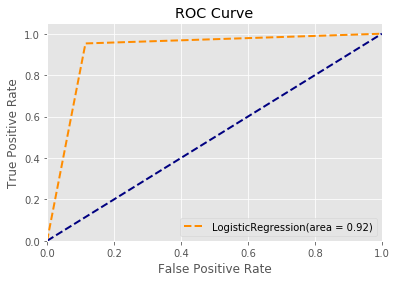

In [82]:
from sklearn import ensemble
from sklearn.linear_model import LogisticRegression
print('=' * 80)
print("Logistic regression")
results.append(benchmark(LogisticRegression(penalty="l2",max_iter=500)))

In [83]:
df=pd.DataFrame()
for i in range(8):
    temp=[x[i] for x in results]
    df[i]=temp

df.columns=["classifier_Name","Accuracy_score","train_time","test_time","f1_score","precision_score","recall_score","roc_auc_score"]
print(df)

          classifier_Name  Accuracy_score  train_time  test_time  f1_score  \
0         RidgeClassifier        0.917377    3.014060   0.078001  0.923042   
1  RandomForestClassifier        0.915574  600.702415   4.959572  0.919161   
2               LinearSVC        0.920777    1.237393   0.068400  0.925661   
3               LinearSVC        0.920981    1.018794   0.062399  0.925833   
4         NearestCentroid        0.855850    0.561797   0.109199  0.867233   
5           MultinomialNB        0.891611    0.649596   0.062600  0.894236   
6             BernoulliNB        0.863510    3.176380   0.460397  0.877383   
7      LogisticRegression        0.920326    1.275193   0.027600  0.925126   

   precision_score  recall_score  roc_auc_score  
0         0.889346      0.959391       0.915946  
1         0.909211      0.929331       0.915106  
2         0.898046      0.955029       0.919610  
3         0.898440      0.954949       0.919825  
4         0.827013      0.911564       0.853952

In [84]:
Test_data.head()

,Clean Title,IsSecured,RandomForestClassifierPrediction,RandomForestClassifierProb_for_0,RandomForestClassifierProb_for_1,MultinomialNBPrediction,MultinomialNBProb_for_0,MultinomialNBProb_for_1,BernoulliNBPrediction,BernoulliNBProb_for_0,BernoulliNBProb_for_1,LogisticRegressionPrediction,LogisticRegressionProb_for_0,LogisticRegressionProb_for_1
0,security check for xss and sql injection valid...,1,1,0.000000,1.000000,1,0.001378,0.998622,1,6.394720e-10,1.000000e+00,1,0.002651,0.997349
1,screen readers network performance monitor pat...,0,0,0.990000,0.010000,0,0.999912,0.000088,0,1.000000e+00,1.493081e-21,0,0.987471,0.012529
2,securitytsbasics failed selftest,1,1,0.000000,1.000000,1,0.071104,0.928896,1,2.761760e-03,9.972382e-01,1,0.019747,0.980253
3,investigative exo security hacking,1,1,0.025508,0.974492,1,0.034911,0.965089,1,1.079551e-03,9.989204e-01,1,0.000108,0.999892
4,psosre opstask cleanup pks eus other unused ob...,1,1,0.109733,0.890267,1,0.004820,0.995180,1,1.542804e-06,9.999985e-01,1,0.074028,0.925972


In [85]:
Test_data.to_csv("Test_data.csv")

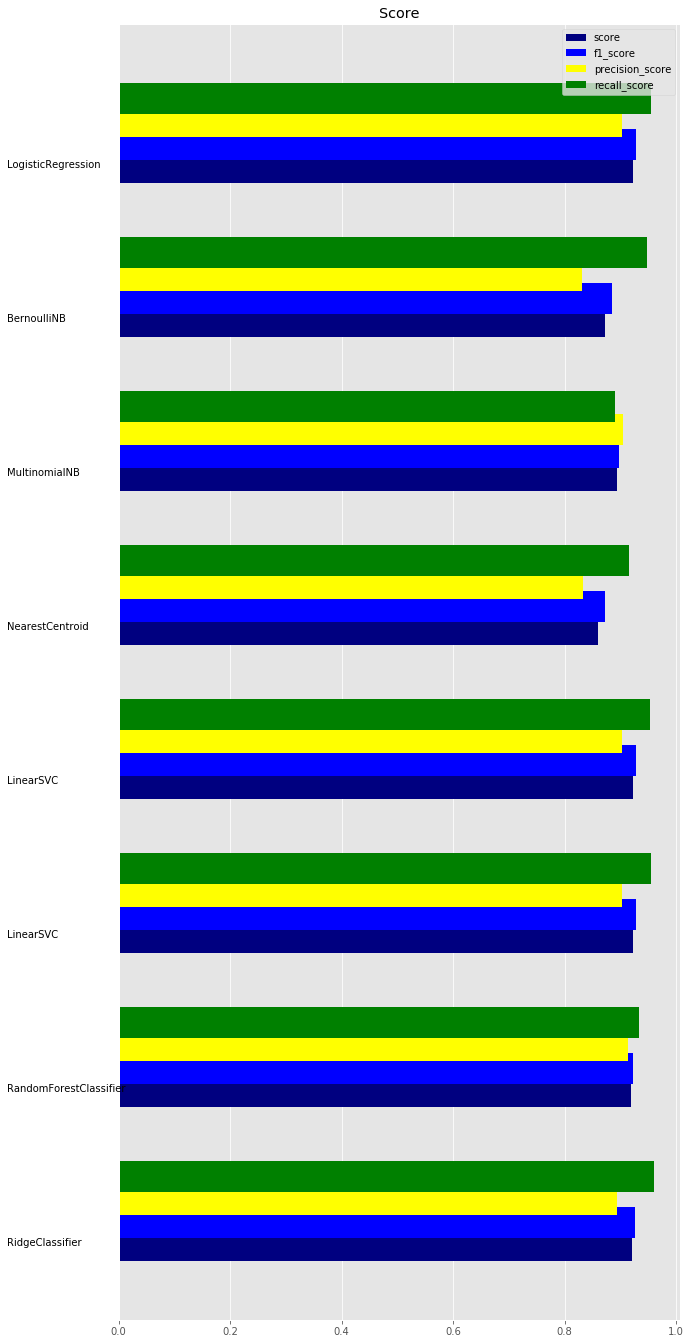

In [24]:
# make some plots
indices = np.arange(len(results))

result = [[x[i] for x in results] for i in range(8)]

clf_names, score, train_time, test_time,f1_score,precision_score,recall_score,roc_auc_score = result
#training_time = np.array(training_time) / np.max(training_time)
#test_time = np.array(test_time) / np.max(test_time)

plt.figure(figsize=(12, 20))
plt.title("Score")
plt.barh(indices, score, .2, label="score", color='navy')
plt.barh(indices + .15, f1_score, .2, label="f1_score", color='blue')
plt.barh(indices + .3, precision_score, .2, label="precision_score", color='yellow')
plt.barh(indices + .45, recall_score, .2, label="recall_score", color='green')
#plt.barh(indices + 1.2, roc_auc_score, .2, label="roc_auc_score", color='darkorange')

#plt.barh(indices + .3, training_time, .2, label="training time",
#         color='c')
#plt.barh(indices + .6, test_time, .2, label="test time", color='darkorange')
plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, clf_names):
    plt.text(-.2, i, c)

plt.show()

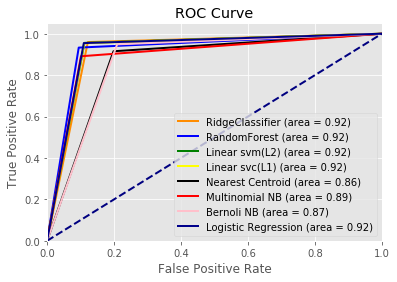

In [25]:
# make some plots
indices = np.arange(len(results))

result_roc = [[x[i] for x in results] for i in range(7,10)]
roc_auc_score,fpr,tpr = result_roc
#training_time = np.array(training_time) / np.max(training_time)
#test_time = np.array(test_time) / np.max(test_time)

plt.figure()
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=2, label='RidgeClassifier (area = %0.2f)' % roc_auc_score[0])
plt.plot(fpr[1], tpr[1], color='blue',
         lw=2, label='RandomForest (area = %0.2f)' % roc_auc_score[1])
plt.plot(fpr[2], tpr[2], color='green',
         lw=2, label='Linear svm(L2) (area = %0.2f)' % roc_auc_score[2])
plt.plot(fpr[3], tpr[3], color='yellow',
         lw=2, label='Linear svc(L1) (area = %0.2f)' % roc_auc_score[3])
plt.plot(fpr[4], tpr[4], color='black',
         lw=2, label='Nearest Centroid (area = %0.2f)' % roc_auc_score[4])
plt.plot(fpr[5], tpr[5], color='red',
         lw=2, label='Multinomial NB (area = %0.2f)' % roc_auc_score[5])
plt.plot(fpr[6], tpr[6], color='pink',
         lw=2, label='Bernoli NB (area = %0.2f)' % roc_auc_score[6])
plt.plot(fpr[7], tpr[7], color='darkblue',
         lw=2, label='Logistic Regression (area = %0.2f)' % roc_auc_score[7])



plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()